Pet Classification Model Using CNN.
Project 3 

DESCRIPTION

Build a CNN model that classifies the given pet images correctly into dog and cat images. 

The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and nonfunctional requirements for the project, it also serves as an input for project scoping. 

Project Description and Scope 

You are provided with the following resources that can be used as inputs for your model: 

1. A collection of images of pets, that is, cats and dogs. These images are of 

different sizes with varied lighting conditions. 2. Code template containing the following code blocks: 

a. Import modules (part 1) b. Set hyper parameters (part 2) c. Read image data set (part 3) d. Run TensorFlow model (part 4) 

You are expected to write the code for CNN image classification model (between Parts 3 and 4) using TensorFlow that trains on the data and calculates the accuracy score on the test data. 

Project Guidelines 

Begin by extracting ipynb file and the data in the same folder. The CNN model (cnn_model_fn) should have the following layers: 

● Input layer 

● Convolutional layer 1 with 32 filters of kernel size[5,5] 

● Pooling layer 1 with pool size[2,2] and stride 2 

● Convolutional layer 2 with 64 filters of kernel size[5,5] 

● Pooling layer 2 with pool size[2,2] and stride 2 

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 

● Dropout layer with dropout probability 0.4 

Predict the class by doing a softmax on the output of the dropout layers. 

This should be followed by training and evaluation: 

1 | Page ©Simplilearn. All rights reserved 

● For the training step, define the loss function and minimize it 

● For the evaluation step, calculate the accuracy 

Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data.

In [65]:
#importing libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import random

In [66]:
# training dataset by collecting photos of cats and dogs from their respective directories and labelling them
cat_files_train = os.listdir('sample_data/PetCollection/Train/Cats')
dog_files_train = os.listdir('sample_data/PetCollection/Train/Dogs')

df_cats = pd.DataFrame({'filename':cat_files_train, 'category':'Cat'})
df_dogs = pd.DataFrame({'filename':dog_files_train, 'category':'Dog'})

# added prefix before filename so that the parent directory will be common for both
df_cats['filename'] = df_cats['filename'].apply(lambda x: "{}{}".format('Cats/', x))
df_dogs['filename'] = df_dogs['filename'].apply(lambda x: "{}{}".format('Dogs/', x))

# merged cats and dogs dataframe and shuffled them to form a single training dataset
df_train = pd.concat([df_cats, df_dogs])
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [67]:
# similar operation performed on test dataset as well
cat_files_test = os.listdir('sample_data/PetCollection/Test/Cats')
dog_files_test = os.listdir('sample_data/PetCollection/Test/Dogs')

df_cats = pd.DataFrame({'filename':cat_files_test, 'category':'Cat'})
df_dogs = pd.DataFrame({'filename':dog_files_test, 'category':'Dog'})

df_cats['filename'] = df_cats['filename'].apply(lambda x: "{}{}".format('Cats/', x))
df_dogs['filename'] = df_dogs['filename'].apply(lambda x: "{}{}".format('Dogs/', x))

df_test = pd.concat([df_cats, df_dogs])
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [68]:
df_train.head()

,filename,category
0,Cats/19.jpg,Cat
1,Cats/16.jpg,Cat
2,Cats/13.jpg,Cat
3,Cats/17.jpg,Cat
4,Dogs/19.jpg,Dog


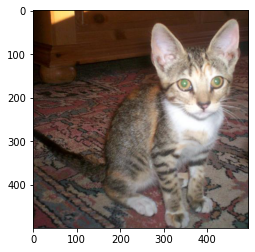

In [69]:
# showing a sample cat image from cat files which verifies os list dir working fine
sample_cat = random.choice(cat_files_train)
img = load_img('sample_data/PetCollection/Train/Cats/'+sample_cat)
plt.imshow(img)

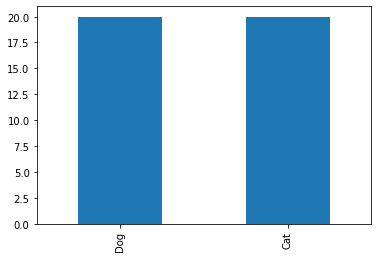

In [70]:
# plotting value count for both the pets
df_train.category.value_counts().plot.bar()

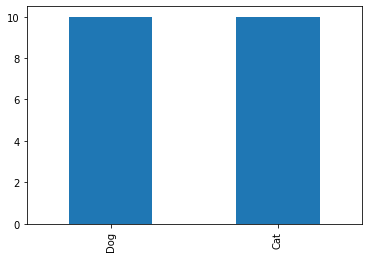

In [71]:
df_test.category.value_counts().plot.bar()

In [72]:
# defining train generator with the help of keras ImageDataGenerator. Image Size is 128*128
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    'sample_data/PetCollection/Train/',  
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=10
)

Found 40 validated image filenames belonging to 2 classes.


In [73]:
# generating a sample image from training generator
example_df = df_train.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    'sample_data/PetCollection/Train/', 
    x_col='filename',
    y_col='category',
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


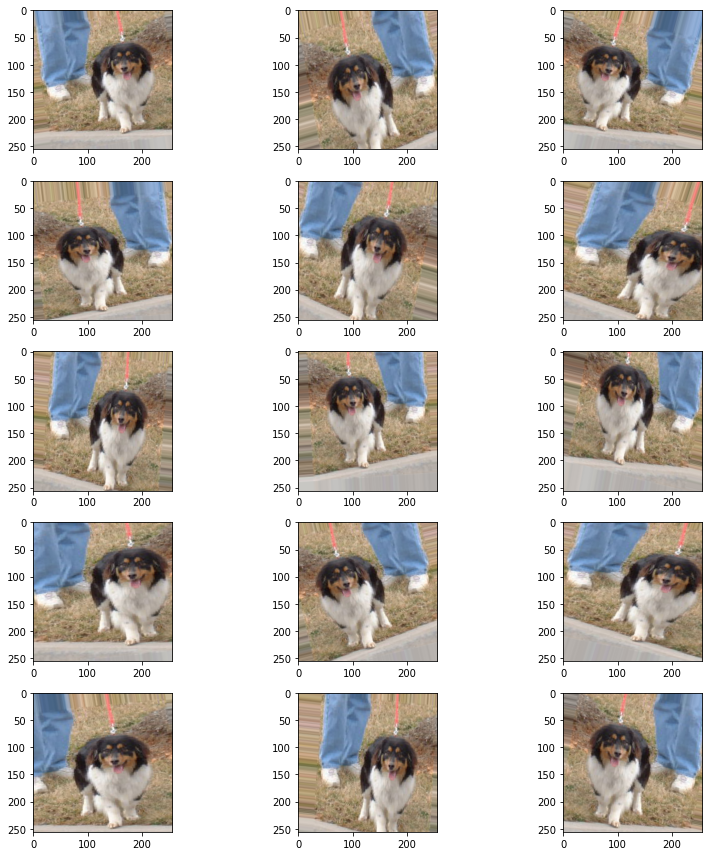

In [74]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [75]:
# generating test generator data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test, 
    'sample_data/PetCollection/Test/', 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=10
)

Found 20 validated image filenames belonging to 2 classes.


In [77]:
# defining our sequential model and adding layers to it as per requirement
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# output layer
model.add(Dense(2, activation='softmax'))

# loss function:- categorical_crossentropy, optimizer:- adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# Training the model for 100 iteration
model.fit(train_generator, epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 627ms/step - loss: 5.1771 - accuracy: 0.4500
Epoch 2/100
4/4 [==============================] - 2s 550ms/step - loss: 10.2194 - accuracy: 0.4250
Epoch 3/100
4/4 [==============================] - 2s 542ms/step - loss: 6.2538 - accuracy: 0.5750
Epoch 4/100
4/4 [==============================] - 2s 531ms/step - loss: 1.7240 - accuracy: 0.6500
Epoch 5/100
4/4 [==============================] - 2s 541ms/step - loss: 6.6101 - accuracy: 0.4750
Epoch 6/100
4/4 [==============================] - 2s 532ms/step - loss: 7.1768 - accuracy: 0.5250
Epoch 7/100
4/4 [==============================] - 2s 527ms/step - loss: 4.6037 - accuracy: 0.6250
Epoch 8/100
4/4 [==============================] - 2s 532ms/step - loss: 2.0472 - accuracy: 0.7000
Epoch 9/100
4/4 [==============================] - 2s 545ms/step - loss: 0.4827 - accuracy: 0.7000
Epoch 10/100
4/4 [==============================] - 2s 524ms/step - loss: 1.1587 - accuracy: 0.7750
Epoch 11

In [64]:
# loss and accuracy for 100 iteration
loss, accuracy = model.evaluate(test_generator)
print(loss)
print(accuracy)

2/2 [==============================] - 0s 201ms/step
2.074070453643799
0.6499999761581421


In [78]:
# Training the model for 200 iteration
model.fit(train_generator, epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 660ms/step - loss: 7.9582 - accuracy: 0.3750
Epoch 2/200
4/4 [==============================] - 2s 549ms/step - loss: 9.4467 - accuracy: 0.4750
Epoch 3/200
4/4 [==============================] - 2s 532ms/step - loss: 9.9068 - accuracy: 0.6000
Epoch 4/200
4/4 [==============================] - 2s 547ms/step - loss: 5.8359 - accuracy: 0.6500
Epoch 5/200
4/4 [==============================] - 2s 524ms/step - loss: 4.9870 - accuracy: 0.5750
Epoch 6/200
4/4 [==============================] - 2s 546ms/step - loss: 4.7613 - accuracy: 0.6750
Epoch 7/200
4/4 [==============================] - 2s 549ms/step - loss: 6.3229 - accuracy: 0.5250
Epoch 8/200
4/4 [==============================] - 2s 557ms/step - loss: 3.9592 - accuracy: 0.7500
Epoch 9/200
4/4 [==============================] - 2s 539ms/step - loss: 3.9315 - accuracy: 0.6500
Epoch 10/200
4/4 [==============================] - 2s 550ms/step - loss: 2.5509 - accuracy: 0.7250
Epoch 11/

In [79]:
# loss and accuracy for 200 iteration
loss, accuracy = model.evaluate(test_generator)
print(loss)
print(accuracy)

2/2 [==============================] - 0s 193ms/step
1.0814967155456543
0.75


In [80]:
# Training the model for 300 iteration
model.fit(train_generator, epochs=300)

Epoch 1/300
4/4 [==============================] - 2s 589ms/step - loss: 0.4544 - accuracy: 0.8750
Epoch 2/300
4/4 [==============================] - 2s 548ms/step - loss: 0.1759 - accuracy: 0.9250
Epoch 3/300
4/4 [==============================] - 2s 531ms/step - loss: 0.1442 - accuracy: 0.8750
Epoch 4/300
4/4 [==============================] - 2s 540ms/step - loss: 0.1947 - accuracy: 0.9000
Epoch 5/300
4/4 [==============================] - 2s 536ms/step - loss: 0.2976 - accuracy: 0.8500
Epoch 6/300
4/4 [==============================] - 2s 539ms/step - loss: 0.4737 - accuracy: 0.8500
Epoch 7/300
4/4 [==============================] - 2s 531ms/step - loss: 0.1546 - accuracy: 0.9000
Epoch 8/300
4/4 [==============================] - 2s 534ms/step - loss: 0.3150 - accuracy: 0.8500
Epoch 9/300
4/4 [==============================] - 2s 533ms/step - loss: 0.2746 - accuracy: 0.8500
Epoch 10/300
4/4 [==============================] - 2s 533ms/step - loss: 0.1911 - accuracy: 0.9250
Epoch 11/

In [81]:
# loss and accuracy for 300 iteration
loss, accuracy = model.evaluate(test_generator)
print(loss)
print(accuracy)

2/2 [==============================] - 0s 205ms/step
1.8255974054336548
0.8500000238418579


In [85]:
predict = model.predict_generator(test_generator)

In [90]:
df_predict = np.argmax(predict, axis=-1)

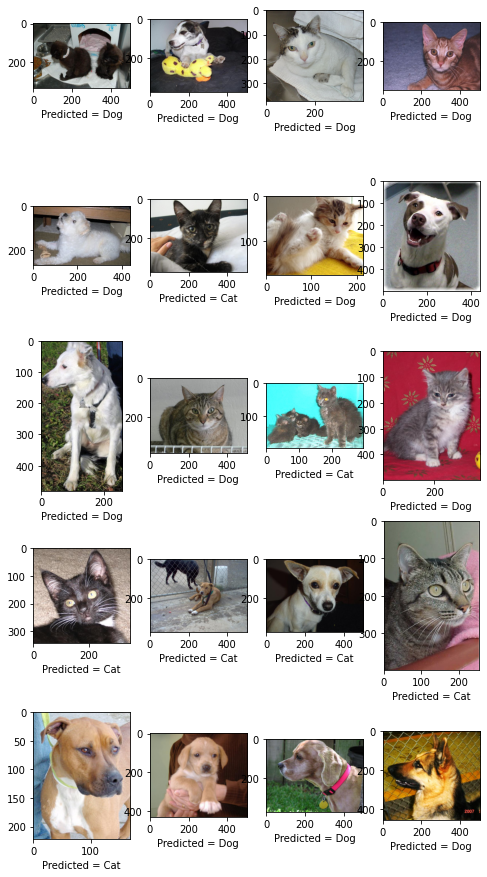

In [118]:
# showing test dataset image along with the prediction 
plt.figure(figsize=(8, 16))
for index, row in df_test.iterrows():
  dir = 'sample_data/PetCollection/Test/'
  plt.subplot(5, 4, index+1)
  img = load_img(dir+row['filename'])
  plt.imshow(img)
  if df_predict[index] == 0:
    label = 'Cat'
  else:
    label = 'Dog'
  plt.xlabel('Predicted = '+label)